# BOOK STORE ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
books = pd.read_csv('Books.csv')
books.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction"
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga


In [3]:
books.isna().sum()


Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64

In [7]:
books['Book'].count()


264

In [8]:
books['Original language'].value_counts()

Original language
English       198
German         11
French          8
Japanese        8
Chinese         7
Italian         7
Spanish         6
Russian         6
Swedish         3
Norwegian       2
Yiddish         2
Gujarati        2
Hindi           1
Portuguese      1
Dutch           1
Czech           1
Name: count, dtype: int64

In [10]:
books['Genre'].value_counts().count()

74

In [16]:
books['sales'] = books['Approximate sales'].astype(str)

In [17]:
books.dtypes

Book                 object
Author(s)            object
Original language    object
First published      object
Approximate sales    object
Genre                object
sales                object
dtype: object

In [24]:
books['sales'] = books['Approximate sales'].str.split('[')
sales

['>200 million', '20]', 'circular reporting?]']

['>200 million', '20]', 'circular reporting?]']

In [27]:
books.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre,sales
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,"[>200 million, 20], circular reporting?]]"
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction","[200 million, 21], 22]]"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction","[120 million, 23], 24]]"
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,"[100 million, 25]]"
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga,"[100 million, 26], 27]]"


In [28]:
books['sales'] = books['Approximate sales'].str.split('[', expand = True)[0]
books.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre,sales
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,>200 million
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction",200 million
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction",120 million
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,100 million
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga,100 million


In [43]:
books['sales'] = books['sales'].str.split(' ', expand = True)[0]
books['sales'] = books.sales.astype(str)
books.head(10)

,Book,Author(s),Original language,First published,Approximate sales,Genre,sales
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,>200
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction",200
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction",120
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,100
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga,100
5,The Hobbit,J. R. R. Tolkien,English,1937,100 million[28][29][30],"Fantasy, Children's fiction",100
6,She: A History of Adventure,H. Rider Haggard,English,1887,83 million[31],Adventure,83
7,Vardi Wala Gunda (????? ???? ?????),Ved Prakash Sharma,Hindi,1992,>80 million[32][better source needed],Detective,>80
8,The Da Vinci Code,Dan Brown,English,2003,80 million[33],Mystery thriller,80
9,Harry Potter and the Chamber of Secrets,J. K. Rowling,English,1998,77 million[34],Fantasy,77


In [30]:
books['sales']

0      >200
1       200
2       120
3       100
4       100
       ... 
259      10
260      82
261      75
262     >70
263      55
Name: sales, Length: 264, dtype: object

In [45]:

books[books['Original language']=='English']

,Book,Author(s),Original language,First published,Approximate sales,Genre,sales
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,>200
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction",120
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,100
5,The Hobbit,J. R. R. Tolkien,English,1937,100 million[28][29][30],"Fantasy, Children's fiction",100
6,She: A History of Adventure,H. Rider Haggard,English,1887,83 million[31],Adventure,83
...,...,...,...,...,...,...,...
257,Angela's Ashes,Frank McCourt,English,1996,10 million[184],Erotica,10
259,Bridget Jones's Diary,Helen Fielding,English,1996,10 million (as of 2005)[186],Erotica,10
260,World Almanac (published every year),Various authors,English,186876; 1886present,82 million[325][326],Erotica,82
261,Betty Crocker Cookbook,General Mills staff,English,19502016 (12th edition),75 million[327],Erotica,75


<Axes: xlabel='Original language'>

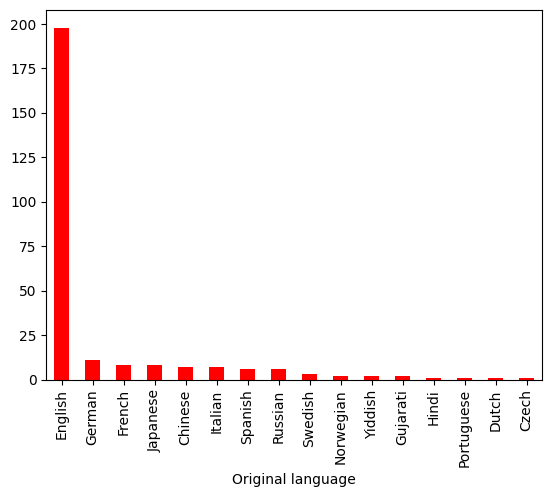

In [47]:
books['Original language'].value_counts().plot(kind= 'bar', color = 'red')

In [53]:
books['sales'].count()

264

In [66]:
for i in range(264):
    if (books['sales'][i]).startswith(">"):
        books['sales'][i] = books['sales'][i][1:] 
books['sales']

0      200
1      200
2      120
3      100
4      100
      ... 
259     10
260     82
261     75
262     70
263     55
Name: sales, Length: 264, dtype: object

In [54]:
books['sales'][0]

'>200'

In [63]:
if (books['sales'][0]).startswith(">"):
        books['sales'][0] = books['sales'][0][1:]

books['sales'][0]

'200'

In [95]:
books['sales'] = books.sales.astype(int)

In [68]:
for i in range(9264):
    l = ''
    for j in range(len(books['sales'][i])):
        if books['sales'][i][j].isdigit():
            l += books['sales'][i][j]
    books['sales'][i] = l

In [76]:
books.sales[0:8]

0    200
1    200
2    120
3    100
4    100
5    100
6     83
7     80
Name: sales, dtype: object

In [79]:
for i in range(10,264):
    books['sales'][i] = books['sales'][i][0:2]

In [80]:
books.sales[60:69]

60    40
61    40
62    40
63    40
64    39
65    37
66    36
67    36
68    35
Name: sales, dtype: object

In [90]:
for i in range(10,264):
    if len(books['sales'][i])==0:
        print(i)

74


In [134]:
# for i in range(264):
#     # print(books.sales[i])

In [94]:
books.sales[74]

0

<Axes: xlabel='Sales'>

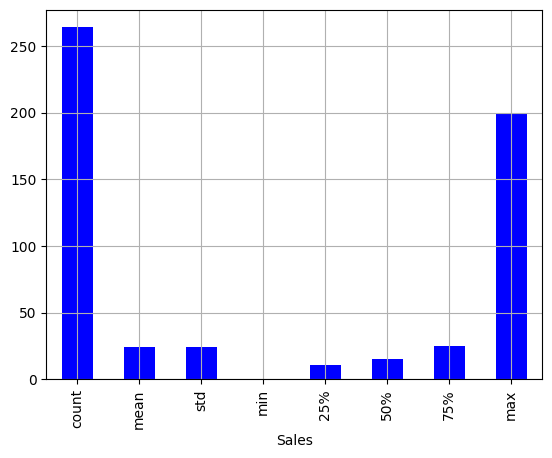

In [105]:
books.sales.describe().plot(kind = 'bar', color = 'blue',xlabel = 'Sales', grid = True)


In [106]:
books.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre,sales
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,200
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction",200
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction",120
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,100
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga,100


In [114]:
books['Author(s)'].value_counts()

Author(s)
J. K. Rowling         7
Roald Dahl            5
Michael Ende          5
E. L. James           5
Erskine Caldwell      5
                     ..
Colleen McCullough    1
Wayne Dyer            1
Anne Frank            1
Carlo Collodi         1
Merriam-Webster       1
Name: count, Length: 153, dtype: int64

In [126]:
for i in range(264):
    books['First published'][i] = books['First published'][i][0:4]
books['First published'] = books['First published'].astype(int)


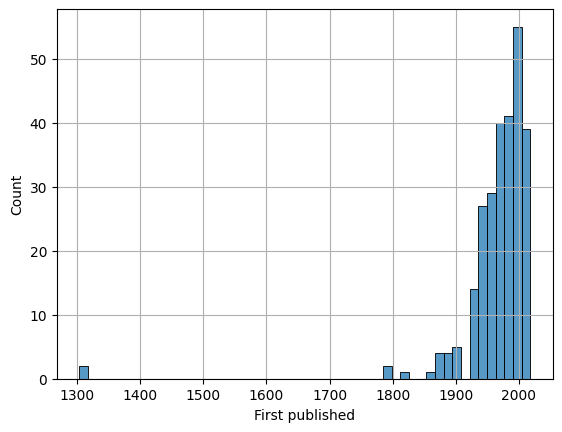

In [125]:
sns.histplot(books['First published'])
plt.grid()


### Top 5 BOOKS with Maximun Sales in MILLION

In [129]:
books.sort_values(by = 'sales',ascending=False).head(5)

,Book,Author(s),Original language,First published,Approximate sales,Genre,sales
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,200
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction",200
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction",120
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,100
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga,100


In [132]:
books.rename(columns = {'sales':'Sales_in_Millions'},inplace = True)

In [133]:
books.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre,Sales_in_Millions
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction,200
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction",200
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction",120
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery,100
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga,100
